In [1]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [3]:
seed_list = [7, 14, 21]
dataset_list = [2, 12, 32, 100]
source_list = [12, 32, 100]
sample_list = [64, 256, 1024, 4096, 16384, 32768]
w_list = ['wpca', 'w0', 'w1']
aux_list = ['aux', 'aux0', 'aux1']
isi_list = ['isi', 'isi0', 'isi1']

datadir = '/Users/xli77/Documents/MISA/MISA-data/torch'

loss_mat = np.zeros([len(dataset_list), len(source_list), len(sample_list), len(seed_list), len(w_list) ])
for i, n_dataset in enumerate(dataset_list):
    for j, n_source in enumerate(source_list):
        if (n_dataset==32 and n_source==100) or (n_dataset==100 and n_source==32) or (n_dataset==100 and n_source==100):
            continue
        for k, n_sample in enumerate(sample_list):
            if (n_source > n_sample) or (n_dataset > n_sample):
                continue
            for m, w in enumerate(w_list):
                for n, seed in enumerate(seed_list):
                    pass
                    # datapath=os.path.join(datadir, f'out-siva_dataset{n_dataset}_source{n_source}_sample{n_sample}_seed{seed}_{w}')
                    # loss_mat[i,j,k,m,n]=float(sio.loadmat(datapath)[aux_list[m]][1,0])

In [4]:
loss_mat=np.load("/Users/xli77/Documents/MISA-pytorch/run/checkpoints/sim-siva/misa_sim-siva_loss_mat.npy")
loss_py=np.load("/Users/xli77/Documents/MISA-pytorch/run/checkpoints/sim-siva/misa_sim-siva_loss_py.npy")

In [5]:
loss_py_valid_dataset = []
loss_mat_valid_dataset = []

for i, n_dataset in enumerate(dataset_list):
    valid_ind = loss_py[i,:,:,:,:].flatten()!=0
    loss_py_valid = loss_py[i,:,:,:,:].flatten()[valid_ind]
    loss_mat_valid = loss_mat[i,:,:,:,:].flatten()[valid_ind]
    loss_py_valid_dataset.append(loss_py_valid)
    loss_mat_valid_dataset.append(loss_mat_valid)

loss_py_valid_source = []
loss_mat_valid_source = []

for j, n_source in enumerate(source_list):
    valid_ind = loss_py[:,j,:,:,:].flatten()!=0
    loss_py_valid = loss_py[:,j,:,:,:].flatten()[valid_ind]
    loss_mat_valid = loss_mat[:,j,:,:,:].flatten()[valid_ind]
    loss_py_valid_source.append(loss_py_valid)
    loss_mat_valid_source.append(loss_mat_valid)

loss_py_valid_sample = []
loss_mat_valid_sample = []

for k, n_sample in enumerate(sample_list):
    valid_ind = loss_py[:,:,k,:,:].flatten()!=0
    loss_py_valid = loss_py[:,:,k,:,:].flatten()[valid_ind]
    loss_mat_valid = loss_mat[:,:,k,:,:].flatten()[valid_ind]
    loss_py_valid_sample.append(loss_py_valid)
    loss_mat_valid_sample.append(loss_mat_valid)

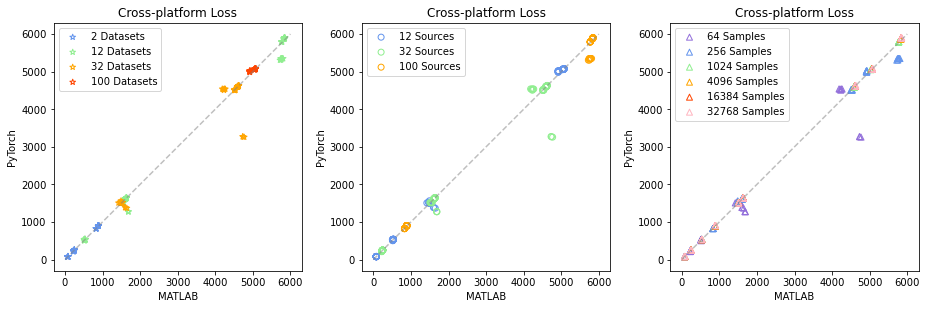

In [6]:
dataset_color_list = ['cornflowerblue', 'lightgreen', 'orange', 'orangered']
source_color_list = ['cornflowerblue', 'lightgreen', 'orange']
sample_color_list = ['mediumpurple', 'cornflowerblue', 'lightgreen', 'orange', 'orangered', 'lightpink']

fig, axes = plt.subplots( 1, 3, figsize=(13,5) )

for i in range(len(dataset_list)):
    axes[0].scatter(loss_mat_valid_dataset[i],loss_py_valid_dataset[i],edgecolors=dataset_color_list[i],facecolors='none',marker='*',label=f"{dataset_list[i]} Datasets")

for i in range(len(source_list)):
    axes[1].scatter(loss_mat_valid_source[i],loss_py_valid_source[i],edgecolors=source_color_list[i],facecolors='none',marker='o',label=f"{source_list[i]} Sources")

for i in range(len(sample_list)):   
    axes[2].scatter(loss_mat_valid_sample[i],loss_py_valid_sample[i],edgecolors=sample_color_list[i],facecolors='none',marker='^',label=f"{sample_list[i]} Samples")

for i in range(3):
    axes[i].plot(range(6000),range(6000),'--',c='gray',alpha=0.5)
    axes[i].set_aspect('equal', 'box')
    axes[i].set_xlabel("MATLAB")
    axes[i].set_ylabel("PyTorch")
    axes[i].set_title("Cross-platform Loss")
    axes[i].legend()

plt.tight_layout()
plt.savefig("/Users/xli77/Documents/MISA-pytorch/figures/loss.pdf")